Introduction
The primary goal of the project is to go through the general data analysis process — using basic data analysis technique with NumPy, pandas, and Matplotlib.
I have been give data of movies from year 1966 to 2015 !
It collects 5000+ movies basic move information and movie matrices, including user ratings, popularity and revenue data. These metrics can be seen as how successful these movies are. The movie basic information contained like cast, director, keywords, runtime, genres, etc.


Questions that are taken into account are :


Question 1: Popularity Over Years

Question 2: Number of movie released year by year

Question 3: Show the variation of popularity in genre Comedy ?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
% matplotlib inline

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [3]:
# only column info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
#some descriptive statistics for a data set

df.describe ()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
# Here I am filtering tohe random 3 movies whose budget is zero in the given csv file
df_budget_zero = df.query('budget == 0')
df_budget_zero.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04


In [6]:

#Similarly done for revenue = 0 data

df_revenue_zero = df.query('revenue == 0')
df_revenue_zero.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.0
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.0
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.000000e+00,0.0


In [7]:
# zero values od budget
df_budget_0count =  df.groupby('budget').count()['id']
df_budget_0count.head(2)



budget
0    5696
1       4
Name: id, dtype: int64

In [8]:
#zero values of revenue
df_revenue_0count =  df.groupby('revenue').count()['id']
df_revenue_0count.head(2)

revenue
0    6016
2       2
Name: id, dtype: int64

In [9]:
#delete duplicates
df.drop_duplicates(inplace=True)

DATA WRANGLING 

 Categories
 

In [10]:
genre_details = list(map(str,(df['genres'])))
genre = []
for i in genre_details:
    split_genre = list(map(str, i.split('|')))
    for j in split_genre:
        if j not in genre:
            genre.append(j)
# printing list of seperated genres.

print(genre)

['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy', 'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy', 'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror', 'Documentary', 'TV Movie', 'nan', 'Foreign']


In [11]:
# minimum range value
min_year = df['release_year'].min()
# maximum range value
max_year = df['release_year'].max()
print(min_year, max_year)

1960 2015


NUMBER OF MOVIES RELEASED IN THEIR RESPECTIVE YEARS !

In [12]:
genre_df = pd.DataFrame(index = genre, columns = range(min_year, max_year + 1))
# to fill not assigned values to zero
genre_df = genre_df.fillna(value = 0)


In [13]:
# list of years of each movie
year = np.array(df['release_year'])
# index to access year value
z = 0
for i in genre_details:
    split_genre = list(map(str,i.split('|')))
    for j in split_genre:
        genre_df.loc[j, year[z]] = genre_df.loc[j, year[z]] + 1
    z+=1
genre_df

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Action,8,7,8,4,5,9,14,7,6,10,...,80,95,99,108,107,115,99,121,129,107
Adventure,5,6,7,7,5,6,11,7,5,5,...,55,60,63,72,59,62,50,67,67,69
Science Fiction,3,4,2,2,4,2,6,4,4,3,...,30,41,52,71,45,56,54,61,62,86
Thriller,6,0,7,10,9,11,8,5,5,3,...,114,125,127,157,134,146,160,175,179,171
Fantasy,2,2,1,2,4,0,2,3,5,2,...,34,47,43,49,44,46,34,39,36,33
Crime,2,2,3,4,10,2,5,7,5,3,...,53,65,62,52,50,48,54,71,65,51
Western,6,3,3,2,1,4,7,2,1,7,...,1,5,2,0,6,3,4,3,6,6
Drama,13,16,21,13,20,20,16,16,20,13,...,197,197,233,224,210,214,232,253,284,260
Family,3,5,2,3,4,3,7,3,5,4,...,65,45,56,60,55,72,42,48,43,44
Animation,0,1,0,1,2,1,3,2,3,3,...,39,32,33,48,50,46,40,42,36,39





Oldest And The Latest Movie Release Years !

QUESTION 1 > POPULARITY OVER THE YEARS !

Below is the popularity of the movies in latest five years

In [14]:
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [15]:
p_median = df.groupby('release_year').median()['popularity']
p_median.tail()

release_year
2011    0.418728
2012    0.333248
2013    0.347558
2014    0.369884
2015    0.394466
Name: popularity, dtype: float64

In [16]:
p_mean = df.groupby('release_year').mean()['popularity']
p_mean.tail()

release_year
2011    0.675069
2012    0.607197
2013    0.627627
2014    0.887268
2015    1.030657
Name: popularity, dtype: float64

In [17]:
index_mean = p_mean.index
index_median = p_median.index

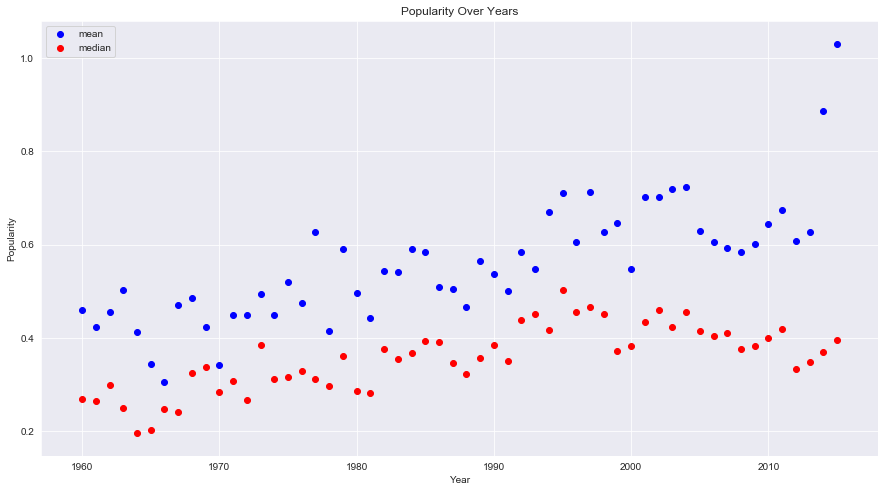

In [18]:

sns.set_style('darkgrid')
x1, y1 = index_mean, p_mean
x2, y2 = index_median, p_median
plt.figure(figsize=(15, 8))
plt.scatter(x1, y1, color = 'b', label = 'mean')
plt.scatter(x2, y2, color = 'r', label = 'median')
plt.title('Popularity Over Years')
plt.xlabel('Year')
plt.ylabel('Popularity');
plt.legend(loc='upper left')

Here we can see the mean distribution is greater than the median . The median distribution is falling year by year.


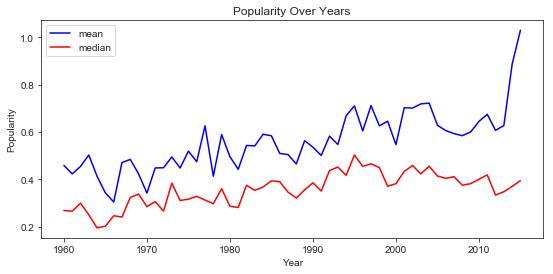

In [19]:
sns.set_style('ticks')
x1, y1 = index_mean, p_mean
x2, y2 = index_median, p_median
plt.figure(figsize=(9, 4))
plt.plot(x1, y1, color = 'b', label = 'mean')
plt.plot(x2, y2, color = 'r', label = 'median')
plt.title('Popularity Over Years')
plt.xlabel('Year')
plt.ylabel('Popularity');
plt.legend(loc='upper left')

ANSWER --> As we go from left to right the popularity of mean is upward and the highest it is in the year 2015. 
 Inversely the popularity of median has decreased from left to right.This is because there are other sources available where we can the reviews watch online movies etc.

QUESTION 2--> Number of movie released year by year

In [20]:
counter = df.groupby('release_year').count()['id']
counter.head()

release_year
1960    32
1961    31
1962    32
1963    34
1964    42
Name: id, dtype: int64

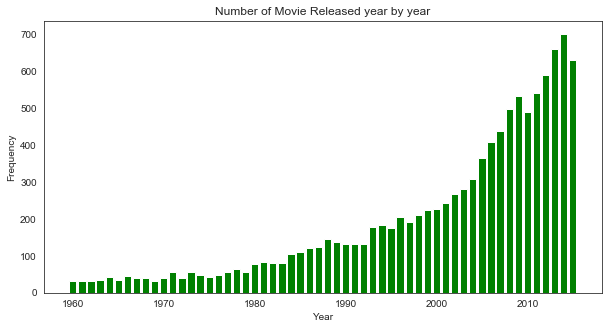

In [21]:
sns.set_style('white')
x = counter.index
y = counter
plt.figure(figsize=(10, 5))
plt.bar(x, y, color = 'g', label = 'mean')
plt.title('Number of Movie Released year by year')
plt.xlabel('Year')
plt.ylabel('Frequency');

ANSWER 2 --> We can see from the above bar diagram that the frequency of number of movies releasing is increasing increasing
exponentially. As we can see the number of movies released in 1960 is least , from there the graph goes on increasing.

Properties are associated with movies that have high popularity?

Question 3--> Budget level movie which are associated with movies that have high popularity?

In [22]:

#dataframe with genre as index and years as columns to get a count of popularity


popularity_df = pd.DataFrame(index = genre, columns = range(min_year, max_year + 1))
# to fill not assigned values to zero
popularity_df = popularity_df.fillna(value = 0.0)


In [23]:
#list of popularity levels of each movie

popularity = np.array(df['popularity'])  #numpy
# to check whether any popularity is zero.
print (len(popularity[popularity==0]))
# index to access year value
z = 0
for i in genre_details:
    split_genre = list(map(str,i.split('|')))
    for j in split_genre:
            popularity_df.loc[j, year[z]] = popularity_df.loc[j, year[z]] + popularity[z]
    z+=1


0


In [24]:
#function to standardize the popularity of values in dataframe


def standardize(p):
    p_std = (p - p.mean()) / p.std(ddof = 0)
    return p_std

In [25]:
popularity_std = standardize(popularity_df)


In [26]:
#series to hold the popular genre for every year
sankya_genre = pd.Series(index = range(min_year, max_year + 1)) #pandas
sankya_genre.head()

1960   NaN
1961   NaN
1962   NaN
1963   NaN
1964   NaN
dtype: float64

In [27]:
# Maximum standardized popularity value of genre
for i in range(min_year, max_year + 1):
    sankya_genre[i] = popularity_std[i].argmax()
sankya_genre


c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  This is separate from the ipykernel package so we can avoid doing imports until


1960        Drama
1961        Drama
1962        Drama
1963     Thriller
1964       Comedy
1965        Drama
1966        Drama
1967        Drama
1968        Drama
1969        Drama
1970        Drama
1971        Drama
1972        Drama
1973        Drama
1974        Drama
1975        Drama
1976        Drama
1977    Adventure
1978        Drama
1979        Drama
1980       Action
1981    Adventure
1982        Drama
1983       Action
1984       Action
1985       Comedy
1986        Drama
1987       Comedy
1988       Comedy
1989       Comedy
1990        Drama
1991       Comedy
1992       Comedy
1993        Drama
1994        Drama
1995        Drama
1996        Drama
1997     Thriller
1998        Drama
1999        Drama
2000       Comedy
2001        Drama
2002        Drama
2003       Action
2004       Comedy
2005        Drama
2006        Drama
2007        Drama
2008        Drama
2009        Drama
2010        Drama
2011        Drama
2012        Drama
2013        Drama
2014        Drama
2015      

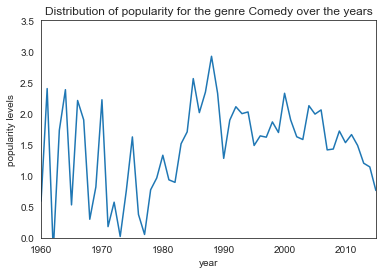

In [28]:
# PLOTTING A GRAPH FOR GENRE COMEDY
plt.plot(popularity_std.loc['Comedy']) 
plt.xlabel('year')
plt.ylabel('popularity levels')
plt.title('Distribution of popularity for the genre Comedy over the years')
plt.axis([1960, 2015, 0, 3.5])
plt.show()


ANSWER 3-->  The above graph shows the rise and fall of the genre COMEDY over the years. 
There are steep rises and falls in the popularity levels of the genre. 


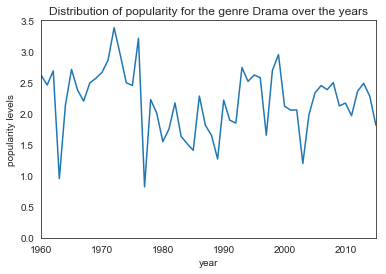

In [29]:
plt.plot(popularity_std.loc['Drama']) 
plt.xlabel('year')
plt.ylabel('popularity levels')
plt.title('Distribution of popularity for the genre Drama over the years')
plt.axis([1960, 2015, 0, 3.5])
plt.show()

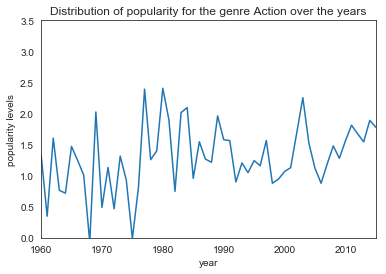

In [30]:
plt.plot(popularity_std.loc['Action']) 
plt.xlabel('year')
plt.ylabel('popularity levels')
plt.title('Distribution of popularity for the genre Action over the years')
plt.axis([1960, 2015, 0, 3.5])
plt.show()

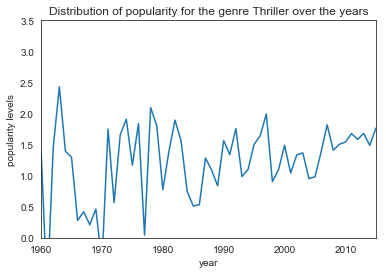

In [31]:
plt.plot(popularity_std.loc['Thriller']) 
plt.xlabel('year')
plt.ylabel('popularity levels')
plt.title('Distribution of popularity for the genre Thriller over the years')
plt.axis([1960, 2015, 0, 3.5])
plt.show()

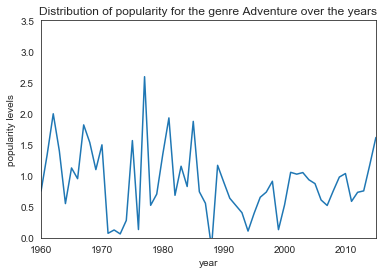

In [32]:
plt.plot(popularity_std.loc['Adventure']) 
plt.xlabel('year')
plt.ylabel('popularity levels')
plt.title('Distribution of popularity for the genre Adventure over the years')
plt.axis([1960, 2015, 0, 3.5])
plt.show()

In [33]:
df_new = df.groupby('release_year').mean()

In [34]:
df_new['runtime'].describe()

count     56.000000
mean     105.705088
std        5.522549
min       96.044006
25%      101.910776
50%      105.678699
75%      107.593247
max      124.343750
Name: runtime, dtype: float64

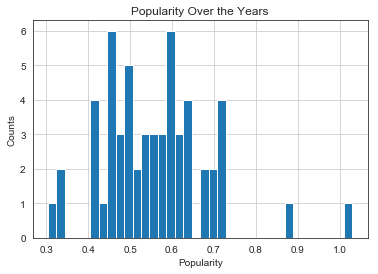

In [35]:
df_new['popularity'].hist(bins=36)
plt.xlabel('Popularity')
plt.ylabel('Counts')
plt.title('Popularity Over the Years');

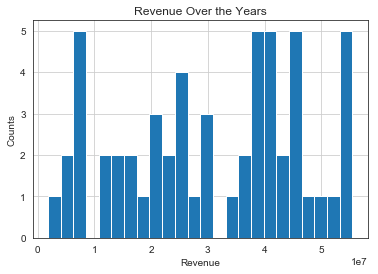

In [36]:
df_new['revenue'].hist(bins=24)
plt.xlabel('Revenue')
plt.ylabel('Counts')
plt.title('Revenue Over the Years');

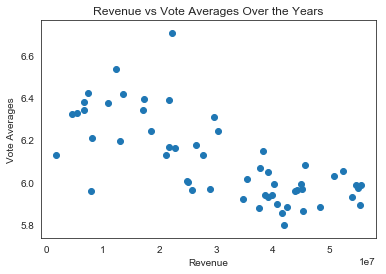

In [37]:
plt.scatter(x=df_new['revenue'], y=df_new['vote_average'])
plt.xlabel('Revenue')
plt.ylabel('Vote Averages')
plt.title('Revenue vs Vote Averages Over the Years');


In [38]:
def find_top(dataframe_col, num=3):
    # split the characters in the input column 
    #and make it to a list
    alist = dataframe_col.str.cat(sep='|').split('|')
    #transfer it to a dataframe
    new = pd.DataFrame({'top' :alist})
    #count their number of appeared times and
    #choose the top3
    top = new['top'].value_counts().head(num)
    return top

In [39]:

# sort the movie release year list.# sort th 
dfyear= df.release_year.unique()
dfyear= np.sort(dfyear)
dfyear

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015], dtype=int64)

In [40]:
y1960s =dfyear[:10]
# year list of 1970s
y1970s =dfyear[10:20]
# year list of 1980s
y1980s =dfyear[20:30]
# year list of 1990s
y1990s = dfyear[30:40]
# year list of afer 2000
y2000 = dfyear[40:]

In [41]:
times = [y1960s, y1970s, y1980s, y1990s, y2000]
#generation name
names = ['1960s', '1970s', '1980s', '1990s', 'after2000']
#creat a empty dataframe,df_r3
df_r3 = pd.DataFrame()
index = 0
#for each generation, do the following procedure
for s in times:
    # first filter dataframe with the selected generation, and store it to dfn
    dfn = df[df.release_year.isin(s)] 
    #apply the find_top function with the selected frame, using the result create a dataframe, store it to dfn2 
    dfn2 = pd.DataFrame({'year' :names[index],'top': find_top(dfn.genres,1)})
     #append dfn2 to df_q2
    df_r3 = df_r3.append(dfn2)
    index +=1
df_r3

,year,top
Drama,1960s,168
Drama,1970s,239
Comedy,1980s,428
Drama,1990s,862
Drama,after2000,3068


Text(0.5,1,'Genres Trends by Generation')

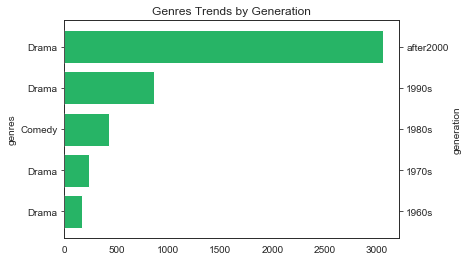

In [42]:
generation = ['1960s', '1970s', '1980s', '1990s', 'after2000']
genres = df_r3.index
y_pos = np.arange(len(generation))
fig, ax = plt.subplots()
# Setting y1: the genre number
y1 = df_r3.top
# Setting y2 again to present the right-side y axis labels
y2 = df_r3.top
#plot the bar
ax.barh(y_pos,y1, color = '#007482')
#set the left side y axis ticks position
ax.set_yticks(y_pos)
#set the left side y axis tick label
ax.set_yticklabels(genres)
#set left side y axis label
ax.set_ylabel('genres')

#create another axis to present the right-side y axis labels
ax2 = ax.twinx()
#plot the bar
ax2.barh(y_pos,y2, color = '#27b466')
#set the right side y axis ticks position
ax2.set_yticks(y_pos)
#set the right side y axis tick label
ax2.set_yticklabels(generation)
#set right side y axis label
ax2.set_ylabel('generation')
#set title
ax.set_title('Genres Trends by Generation')

In [43]:
The genre Drama are the most filmed in almost all generation. Only the 1980s are dominated by the comedy type.

SyntaxError: invalid syntax (<ipython-input-43-5004cb348829>, line 1)

LIMITATIONS :

The medium through which popularity was determined is unknown. This can impact the analysis as the limitations and bias inherent while gauging audience response will be present in the end values too.

This analysis assumes that the same index and methods were employed for collecting popularity factors and counting votes for all movies. In the event that it is not so, the results might not hold true. 

While we did not have missing values for any of the factors under consideration, we acknowledge the presence of these limitations and assumptions in our analysis.

In [ ]:
CONCLUSION:

Thus the most popular genre in most of the years is Drama. The above graphs show the popularity of each genre from 1960 to 2015. 
    